In [4]:
# Import Packages
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g., pd.read_csv)
import os
import matplotlib.pyplot as plt  # moved this import outside the loop
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

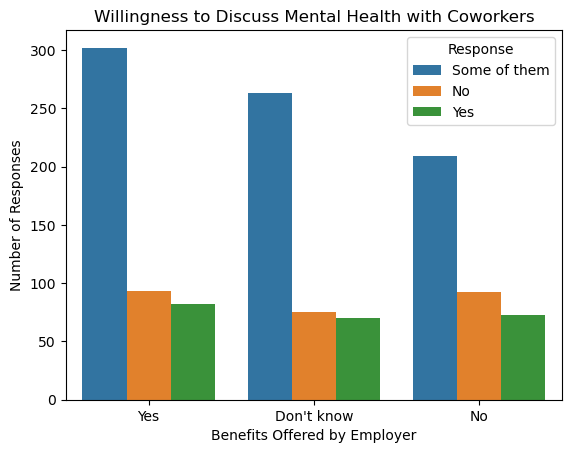

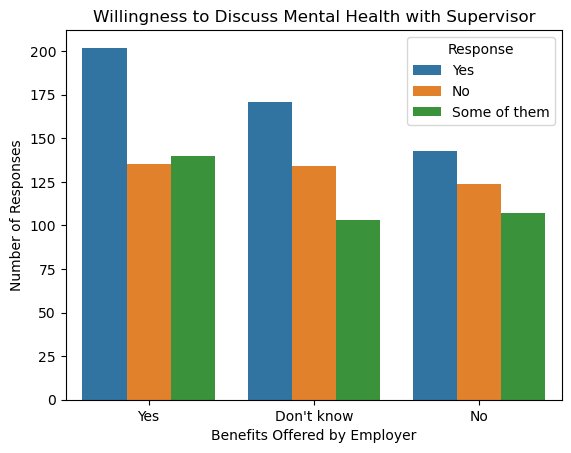

In [5]:
#Karlee
#Import and read CSV File
mental_health_data = pd.read_csv('survey.csv')

#Filter data to display information relevant to the correlation between mental health benefits and the willingness to have discussion with others
relevant_info = ['benefits','coworkers', 'supervisor', 'mental_health_interview']
filtered_data = mental_health_data[relevant_info].dropna()

#Create a visualization showing willingness to discuss with coworkers if benefits are offered by employer
sns.countplot(data=filtered_data, x='benefits', hue='coworkers')

plt.title('Willingness to Discuss Mental Health with Coworkers')
plt.xlabel('Benefits Offered by Employer')
plt.ylabel('Number of Responses')
plt.legend(title='Response')
plt.show()

#Create a visualization showing willingness to discuss with supervisor if benefits are offered by employer
sns.countplot(data=filtered_data, x='benefits', hue='supervisor')

plt.title('Willingness to Discuss Mental Health with Supervisor')
plt.xlabel('Benefits Offered by Employer')
plt.ylabel('Number of Responses')
plt.legend(title='Response')
plt.show()

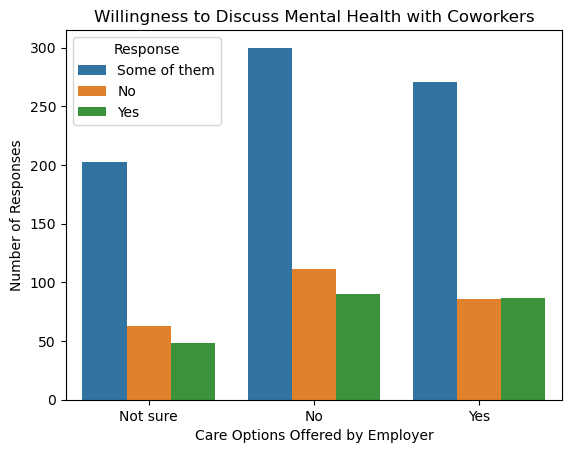

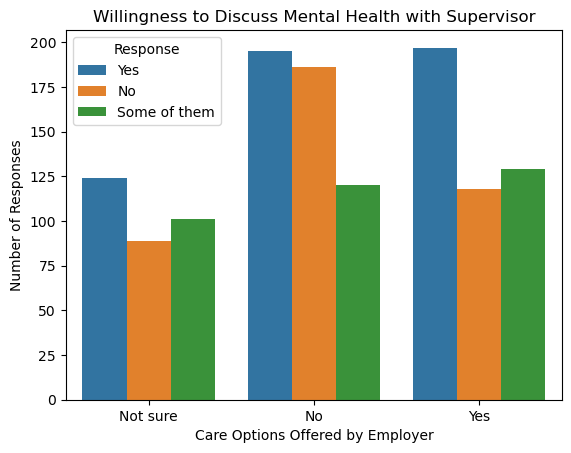

In [6]:
#Filter data to show relevant data regarding various types of mental health support in the workplace 
relevant_info_support = ['care_options','wellness_program','coworkers', 'supervisor', 'mental_health_interview']
filtered_data_support = mental_health_data[relevant_info_support].dropna()

#Create a visualization showing willingness to discuss with coworkers if care options are offered
sns.countplot(data=filtered_data_support, x='care_options', hue='coworkers')
plt.title('Willingness to Discuss Mental Health with Coworkers')
plt.xlabel('Care Options Offered by Employer')
plt.ylabel('Number of Responses')
plt.legend(title='Response')
plt.show()

#Create a visualization showing willingness to discuss with supervisor if care options are offered
sns.countplot(data=filtered_data_support, x='care_options', hue='supervisor')

plt.title('Willingness to Discuss Mental Health with Supervisor')
plt.xlabel('Care Options Offered by Employer')
plt.ylabel('Number of Responses')
plt.legend(title='Response')
plt.show()


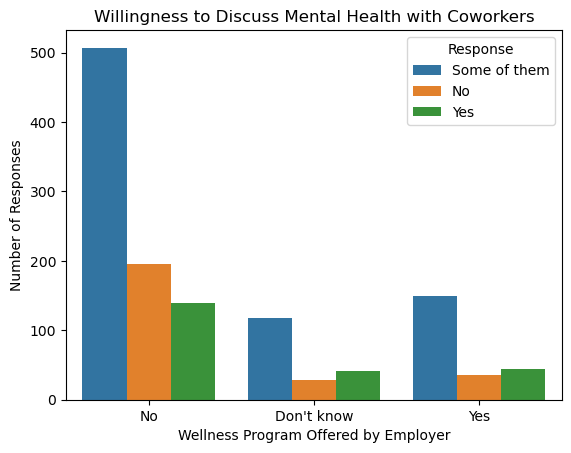

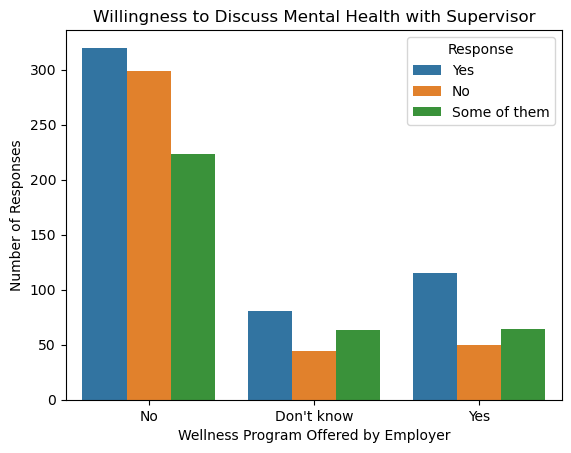

In [7]:
#Create a visualization showing willingness to discuss with coworkers if wellness program is offered
sns.countplot(data=filtered_data_support, x='wellness_program', hue='coworkers')
plt.title('Willingness to Discuss Mental Health with Coworkers')
plt.xlabel('Wellness Program Offered by Employer')
plt.ylabel('Number of Responses')
plt.legend(title='Response')
plt.show()

#Create a visualization showing willingness to discuss with supervisor wellness program is offered
sns.countplot(data=filtered_data_support, x='wellness_program', hue='supervisor')

plt.title('Willingness to Discuss Mental Health with Supervisor')
plt.xlabel('Wellness Program Offered by Employer')
plt.ylabel('Number of Responses')
plt.legend(title='Response')
plt.show()

In [8]:
df = pd.read_csv('survey.csv')
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [13]:
repGen={'Female':'Female','M':'Male','male':'Male','Male':'Male','m':'Male','Male-ish':'Others','maile':'Male','Trans-female':'Others',
        'Cis Female':'Female','F':'Female','something kinda male?':'Others','Cis Male':'Male','Woman':'Female','f':'Female','Mal':'Male',
        'Male (CIS)':'Male','queer/she/they':'Others','non-binary':'Others','Femake':'Female','woman':'Female','Make':'Male','Nah':'Others',
        'All':'Others','Enby':'Others','fluid':'Others','Genderqueer':'Others','Female ':'Female','Androgyne':'Others','Agender':'Others',
        'cis-female/femme':'Female','Guy (-ish) ^_^':'Others','male leaning androgynous':'Others','Male ':'Male','Man':'Male','Trans woman':'Others',
        'msle':'Male','Neuter':'Others','Female (trans)':'Female','queer':'Others','Female (cis)':'Female','Mail':'Male','cis male':'Male',
        'Malr':'Male','female':'Female','p':'Others','A little about you':'Others','femail':'Female','Cis Man':'Male',
        'ostensibly male, unsure what that really means':'Others'}
df['Gender']=df.Gender.replace(repGen)
gender_values = df.Gender.value_counts().sort_values(ascending=False).to_frame()
gender_values = gender_values.rename(columns={'Gender': 'count'})
gender_values


,count
Gender,
Male,990
Female,249
Others,20


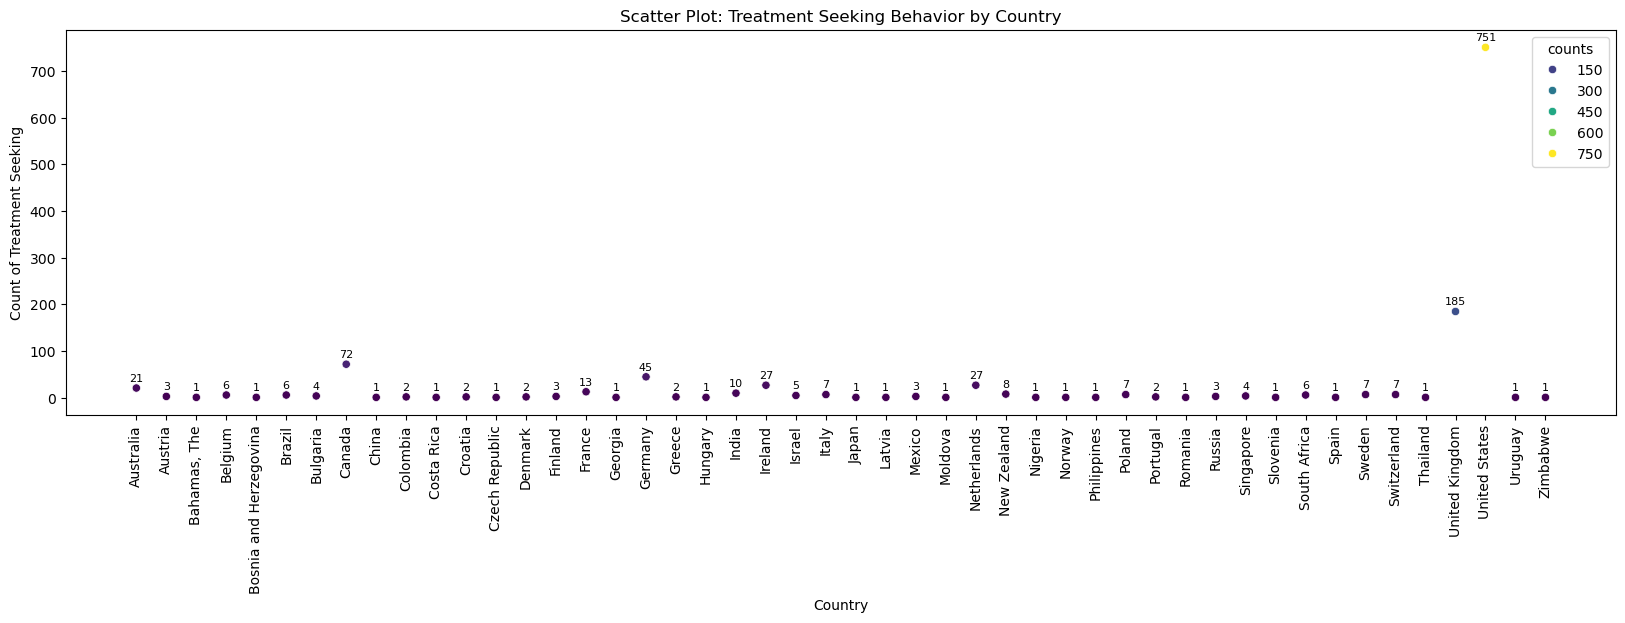

In [11]:
count = df.groupby(['Country']).size().reset_index(name='counts')

plt.figure(figsize=(20, 5))
ax = sns.scatterplot(x='Country', y='counts', hue='counts', palette='viridis', data=count)
plt.title('Scatter Plot: Treatment Seeking Behavior by Country')
plt.xlabel('Country')
plt.ylabel('Count of Treatment Seeking')
plt.xticks(rotation=90)

for i, row in count.iterrows():
    ax.text(row['Country'], row['counts'] + 10, str(row['counts']), 
            color='black', ha='center', va='bottom', fontsize=8)

plt.show()

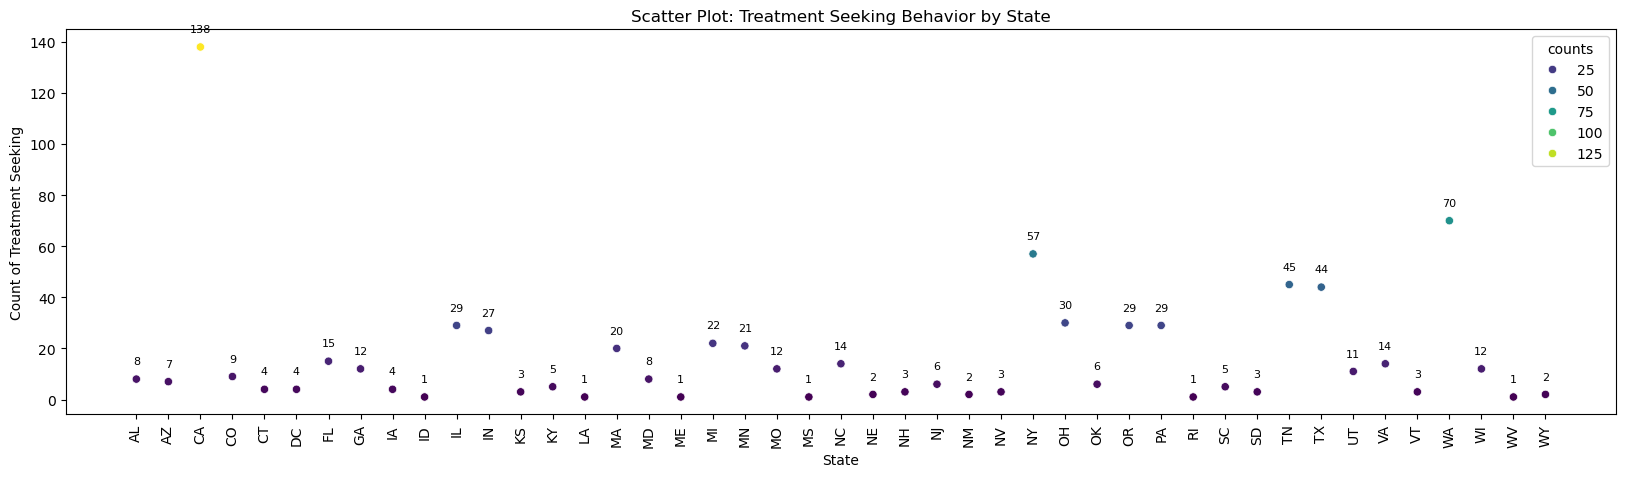

In [12]:
count = df.groupby(['state']).size().reset_index(name='counts')
plt.figure(figsize=(20, 5))
ax = sns.scatterplot(x='state', y='counts', hue='counts', palette='viridis', data=count)
plt.title('Scatter Plot: Treatment Seeking Behavior by State')
plt.xlabel('State')
plt.ylabel('Count of Treatment Seeking')
plt.xticks(rotation=90)
for i, row in count.iterrows():
    ax.text(row['state'], row['counts'] + 5, str(row['counts']), 
            color='black', ha='center', va='bottom', fontsize=8)
plt.show()

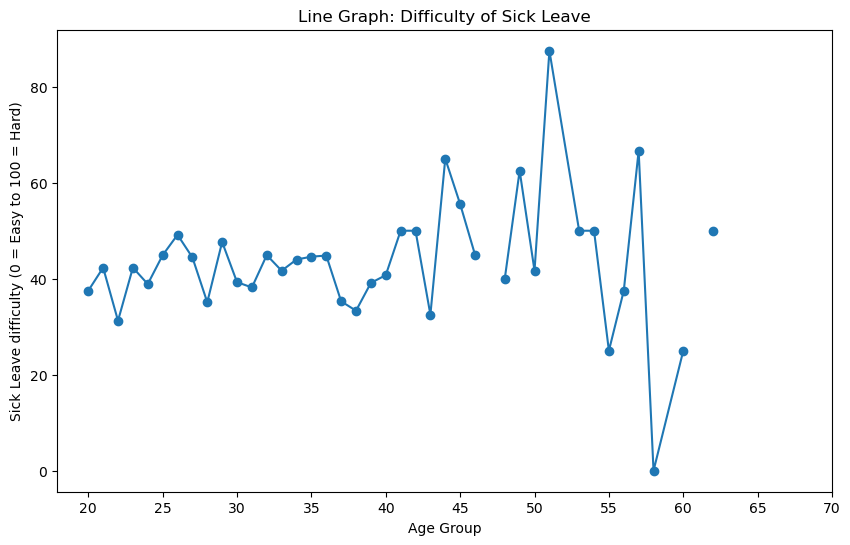

In [10]:
df_filtered = df[(df['Age'] >= 20) & (df['Age'] <= 70)]

leave_mapping = {'Somewhat easy': 0, 'Don\'t know': 50, 'Somewhat difficult': 100}
df_filtered['leave_numeric'] = df_filtered['leave'].map(leave_mapping)

mental_health_data = df_filtered.groupby('Age')['leave_numeric'].mean()

plt.figure(figsize=(10, 6))
plt.plot(mental_health_data, marker='o')
plt.title('Line Graph: Difficulty of Sick Leave')
plt.xlabel('Age Group')
plt.ylabel('Sick Leave difficulty (0 = Easy to 100 = Hard)')

plt.xticks(ticks=range(20, 71, 5), labels=range(20, 71, 5))

plt.show()

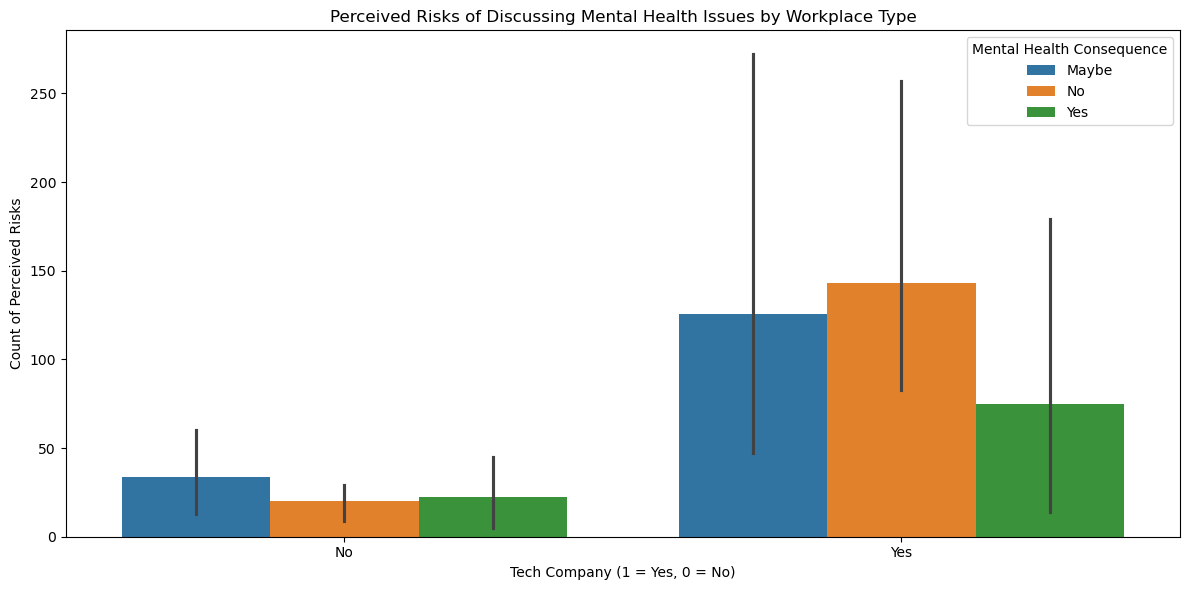

In [9]:
#Zach 
#1. Perceived risks of discussing mental health issues by workplace type
#2. Perceived risks based on wellness programs
#3. Age and perceived risk

#Load CSV File
df = pd.read_csv('survey.csv')

#Grouping the risk summary and comparison data
risk_summary = df.groupby(['tech_company', 'wellness_program', 'mental_health_consequence']).size().reset_index(name='counts')

#Bar Plot for #1: Perceived risks of discussing mental health issues by workplace type
plt.figure(figsize=(12, 6))
sns.barplot(x='tech_company', y='counts', hue='mental_health_consequence', data=risk_summary)
plt.title('Perceived Risks of Discussing Mental Health Issues by Workplace Type')
plt.xlabel('Tech Company (1 = Yes, 0 = No)')
plt.ylabel('Count of Perceived Risks')
plt.legend(title='Mental Health Consequence', loc='upper right')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


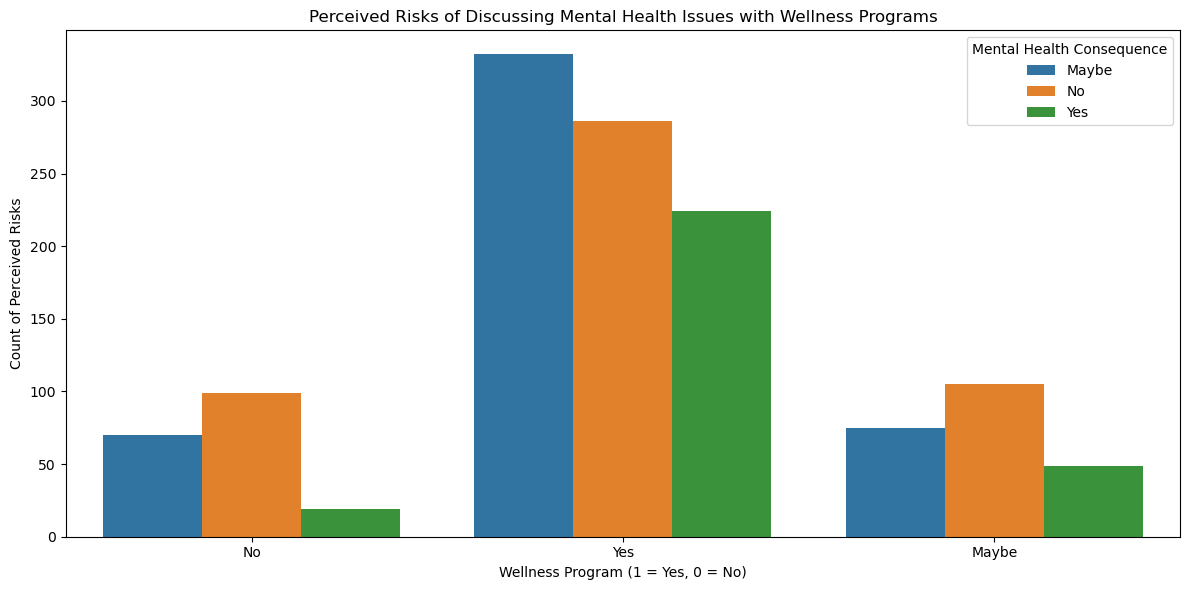

In [25]:
#Zach
#Grouping percieved risks based on wellness programs
wellness_risk_summary = df.groupby(['wellness_program', 'mental_health_consequence']).size().reset_index(name='counts')

#Creating graph #2: Perceived risks based on wellness programs
plt.figure(figsize=(12, 6))
sns.barplot(x='wellness_program', y='counts', hue='mental_health_consequence', data=wellness_risk_summary)
plt.title('Perceived Risks of Discussing Mental Health Issues with Wellness Programs')
plt.xlabel('Wellness Program (1 = Yes, 0 = No)')
plt.ylabel('Count of Perceived Risks')
plt.legend(title='Mental Health Consequence', loc='upper right')
plt.xticks(ticks=[0, 1, 2], labels=['No', 'Yes', 'Maybe'])
plt.tight_layout()
plt.show()

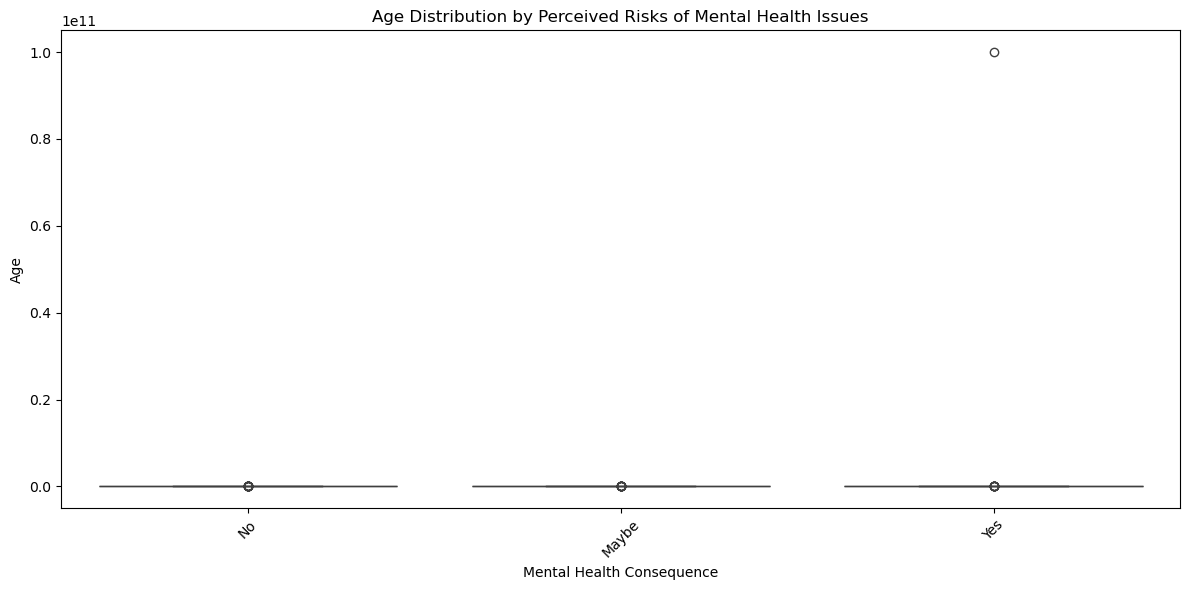

In [23]:
#Zach
#3. Comparing Age and Perceived Risk

plt.figure(figsize=(12, 6))
sns.boxplot(x='mental_health_consequence', y='Age', data=df)
plt.title('Age Distribution by Perceived Risks of Mental Health Issues')
plt.xlabel('Mental Health Consequence')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

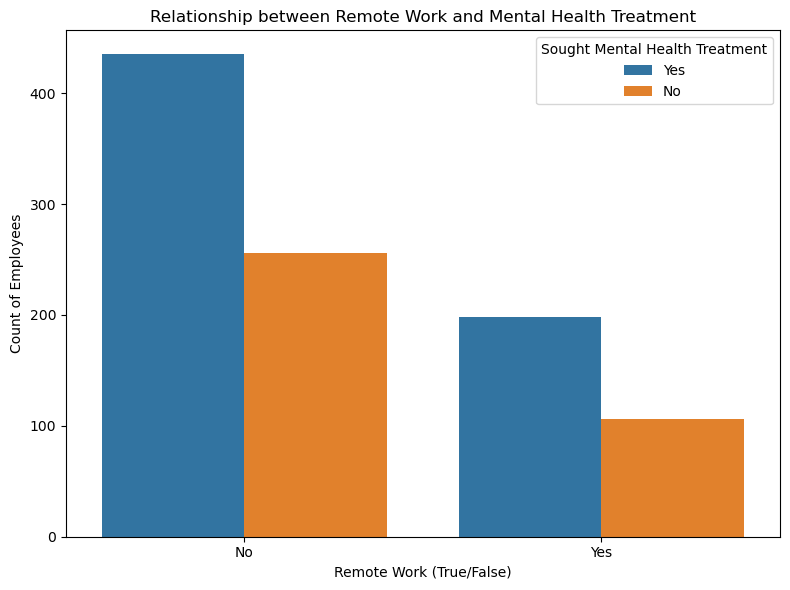

Contingency Table:
treatment_numeric      0    1
remote_work_numeric          
0                    444  439
1                    178  198
Chi-Square Statistic: 0.7996266696549379
P-value: 0.3712050125960662
Degrees of Freedom: 1
Expected frequencies:
[[436.23987292 446.76012708]
 [185.76012708 190.23987292]]
Fail to reject the null hypothesis: There is no significant association between remote work and seeking mental health treatment.


In [12]:
#Jeff 


#Loading CSV File
df = pd.read_csv('/Users/jmg/Desktop/Group-3/survey.csv')

# Filter Data to Relevant Columns 
relevant_columns = ['remote_work', 'no_employees', 'treatment', 'work_interfere']
filtered_df = df[relevant_columns].dropna()

# Show relationship between Remote Work and Mental Health

plt.figure(figsize=(8,6))
sns.countplot(data=filtered_df, x='remote_work', hue='treatment')
plt.title('Relationship between Remote Work and Mental Health Treatment')
plt.xlabel('Remote Work (True/False)')
plt.ylabel('Count of Employees')
plt.legend(title='Sought Mental Health Treatment')
plt.tight_layout()
plt.show()

#Conduct Chi-Square Test of Independence Between Remote Work and Mental Health Treatment 

#Import Required Dependencies
from scipy.stats import chi2_contingency

# Load the dataset (replace the path with the actual one)
df = pd.read_csv('survey.csv')

# Step 1: Prepare the Data
# Convert the 'remote_work' and 'treatment' columns to 1/0 for "Yes"/"No" values
df['remote_work_numeric'] = df['remote_work'].apply(lambda x: 1 if x == 'Yes' else 0)
df['treatment_numeric'] = df['treatment'].apply(lambda x: 1 if x == 'Yes' else 0)

# Step 2: Create a contingency table (cross-tabulation of the two variables)
contingency_table = pd.crosstab(df['remote_work_numeric'], df['treatment_numeric'])

# Print the contingency table to understand the structure
print("Contingency Table:")
print(contingency_table)

# Step 3: Perform the Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 4: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Step 5: Interpretation of Results
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between remote work and seeking mental health treatment.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between remote work and seeking mental health treatment.")




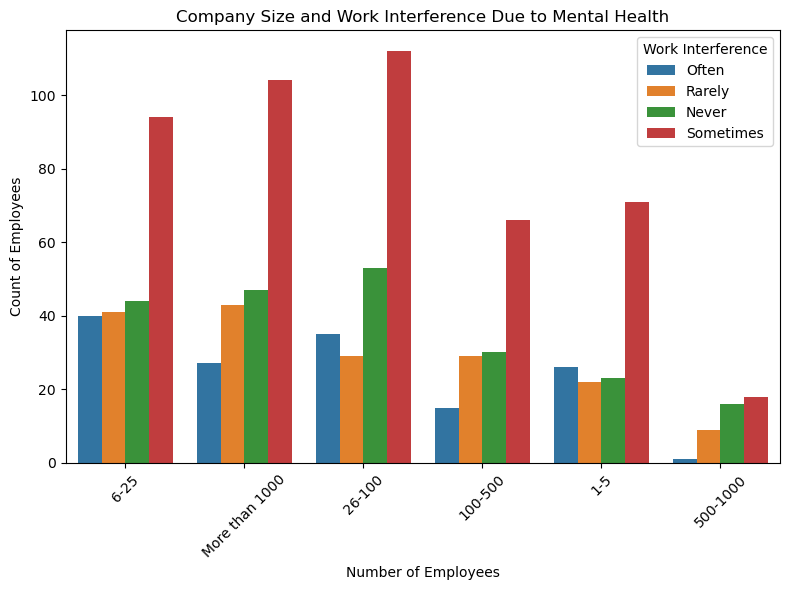

Contingency Table:
work_interfere  Never  Often  Rarely  Sometimes
no_employees                                   
1-5                23     26      22         71
100-500            30     15      29         66
26-100             53     35      29        112
500-1000           16      1       9         18
6-25               44     40      41         94
More than 1000     47     27      43        104
Chi-Square Statistic: 23.98942375085282
P-value: 0.06527330702306726
Degrees of Freedom: 15
Expected Frequencies:
[[ 30.39798995  20.55075377  24.68944724  66.36180905]
 [ 29.96984925  20.26130653  24.34170854  65.42713568]
 [ 49.02211055  33.14170854  39.8160804  107.0201005 ]
 [  9.41909548   6.3678392    7.65025126  20.56281407]
 [ 46.88140704  31.69447236  38.07738693 102.34673367]
 [ 47.30954774  31.9839196   38.42512563 103.28140704]]
Fail to reject the null hypothesis: There is no significant association between company size and work interference due to mental health.


In [15]:
# Jeff

# Show relationship between Company Size and Work Interference due to Mental Health
plt.figure(figsize=(8, 6))
sns.countplot(data=filtered_df, x='no_employees', hue='work_interfere')
plt.title('Company Size and Work Interference Due to Mental Health')
plt.xlabel('Number of Employees')
plt.ylabel('Count of Employees')
plt.legend(title='Work Interference')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Conduct Chi-Square Test of Independence Between Company Size and the extent of wich Mental health inteferes with Work

# Load the dataset (replace with the actual file path if necessary)
df = pd.read_csv('survey.csv')

# Step 1: Create a contingency table for 'no_employees' and 'work_interfere'
contingency_table = pd.crosstab(df['no_employees'], df['work_interfere'])

# Print the contingency table
print("Contingency Table:")
print(contingency_table)

# Step 2: Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 3: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Step 4: Interpretation based on p-value
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between company size and work interference due to mental health.")
else:
    print("Fail to reject the null hypothesis: There is no significant association between company size and work interference due to mental health.")








In [16]:
# Conduct Chi-Square Test of Independence Between Company Size and the extent of wich Mental health inteferes with Work (Excluding Maybe Values)

# Load the dataset (replace with the actual file path if necessary)
df = pd.read_csv('survey.csv')

# Step 1: Filter out the rows where 'work_interfere' is "Maybe"
df_filtered = df[df['work_interfere'] != 'Maybe']

# Step 2: Create a contingency table for 'no_employees' and 'work_interfere' (now only includes "Yes" and "No")
contingency_table = pd.crosstab(df_filtered['no_employees'], df_filtered['work_interfere'])

# Print the contingency table
print("Contingency Table (Excluding 'Maybe'):")
print(contingency_table)

# Step 3: Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Step 4: Output the results
print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Step 5: Interpretation based on p-value
alpha = 0.05  # Significance level
if p < alpha:
    print("Reject the null hypothesis: There is a significant association between company size and work interference due to mental health (excluding 'Maybe').")
else:
    print("Fail to reject the null hypothesis: There is no significant association between company size and work interference due to mental health (excluding 'Maybe').")


Contingency Table (Excluding 'Maybe'):
work_interfere  Never  Often  Rarely  Sometimes
no_employees                                   
1-5                23     26      22         71
100-500            30     15      29         66
26-100             53     35      29        112
500-1000           16      1       9         18
6-25               44     40      41         94
More than 1000     47     27      43        104
Chi-Square Statistic: 23.98942375085282
P-value: 0.06527330702306726
Degrees of Freedom: 15
Expected Frequencies:
[[ 30.39798995  20.55075377  24.68944724  66.36180905]
 [ 29.96984925  20.26130653  24.34170854  65.42713568]
 [ 49.02211055  33.14170854  39.8160804  107.0201005 ]
 [  9.41909548   6.3678392    7.65025126  20.56281407]
 [ 46.88140704  31.69447236  38.07738693 102.34673367]
 [ 47.30954774  31.9839196   38.42512563 103.28140704]]
Fail to reject the null hypothesis: There is no significant association between company size and work interference due to mental hea